#### Import the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [5]:
df = pd.read_csv('google_review_ratings.csv')
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
df.shape
# rows = 5456, cols= 26

(5456, 26)

In [7]:
df.columns = ['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls',
              'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 
              'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs',
              'swimming_pools', 'gyms', 'bakeries', 'beauty_spas', 'cafes', 'view_points',
              'monuments', 'gardens','Unnamed: 25']
df.head(2)

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


#### 1) Handling Null

In [8]:
df.isnull().sum()

User                        0
churches                    0
resorts                     0
beaches                     0
parks                       0
theatres                    0
museums                     0
malls                       0
zoo                         0
restaurants                 0
pubs_bars                   0
local_services              0
burger_pizza_shops          1
hotels_other_lodgings       0
juice_bars                  0
art_galleries               0
dance_clubs                 0
swimming_pools              0
gyms                        0
bakeries                    0
beauty_spas                 0
cafes                       0
view_points                 0
monuments                   0
gardens                     1
Unnamed: 25              5454
dtype: int64

In [9]:
df.drop('Unnamed: 25',axis=1,inplace=True)
df.columns

Index(['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

In [10]:
df.dropna(inplace=True)
nv = df.isnull().sum()
nv = nv[nv>0]
nv

Series([], dtype: int64)

#### Handling Duplicates

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5454, 25)

In [13]:
df['User'].nunique()

5454

In [14]:
# Scenario - 1
# User   Malls   Museums
#  1      4.3     3.8 
#  2      3.7     3.9
#  1      4.3     3.8

# df.drop_duplicated()

# Scenario - 2
# User   Malls   Museums
#  1      4.3     3.8 
#  2      3.7     3.9
#  1      4.4     4.2

# df.groupby(User).mean()

#### Data Types

In [15]:
df.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services            object
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [16]:
df['local_services'].value_counts()

5       1045
1.56      80
1.58      75
1.76      67
1.75      66
        ... 
3.82       1
3.18       1
0.78       1
4.08       1
3.54       1
Name: local_services, Length: 295, dtype: int64

In [17]:
df['local_services'] = pd.to_numeric(df['local_services'])
# OR
# df['local_services'] = df['local_services'].astype(float)
df.dtypes

User                      object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs_bars                float64
local_services           float64
burger_pizza_shops       float64
hotels_other_lodgings    float64
juice_bars               float64
art_galleries            float64
dance_clubs              float64
swimming_pools           float64
gyms                     float64
bakeries                 float64
beauty_spas              float64
cafes                    float64
view_points              float64
monuments                float64
gardens                  float64
dtype: object

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
churches,5454.0,1.455746,0.827732,0.00,0.92,1.34,1.8100,5.0
resorts,5454.0,2.320048,1.421576,0.00,1.36,1.91,2.6875,5.0
beaches,5454.0,2.489059,1.247503,0.00,1.54,2.06,2.7400,5.0
parks,5454.0,2.797103,1.309188,0.83,1.73,2.46,4.0975,5.0
theatres,5454.0,2.958904,1.338785,1.12,1.77,2.67,4.3100,5.0
museums,5454.0,2.893423,1.282101,1.11,1.79,2.68,3.8375,5.0
malls,5454.0,3.351476,1.413291,1.12,1.93,3.23,5.0000,5.0
zoo,5454.0,2.541177,1.111398,0.86,1.62,2.17,3.1900,5.0
restaurants,5454.0,3.126542,1.356774,0.84,1.80,2.80,5.0000,5.0
pubs_bars,5454.0,2.832695,1.307299,0.81,1.64,2.68,3.5275,5.0


### EDA

#### Avg Rating for each feature

In [21]:
avg_rating = df.iloc[:,1:].mean()
avg_rating

churches                 1.455746
resorts                  2.320048
beaches                  2.489059
parks                    2.797103
theatres                 2.958904
museums                  2.893423
malls                    3.351476
zoo                      2.541177
restaurants              3.126542
pubs_bars                2.832695
local_services           2.549622
burger_pizza_shops       2.078401
hotels_other_lodgings    2.125820
juice_bars               2.190429
art_galleries            2.206140
dance_clubs              1.192710
swimming_pools           0.949349
gyms                     0.822525
bakeries                 0.969250
beauty_spas              0.999626
cafes                    0.965275
view_points              1.749345
monuments                1.531051
gardens                  1.560570
dtype: float64

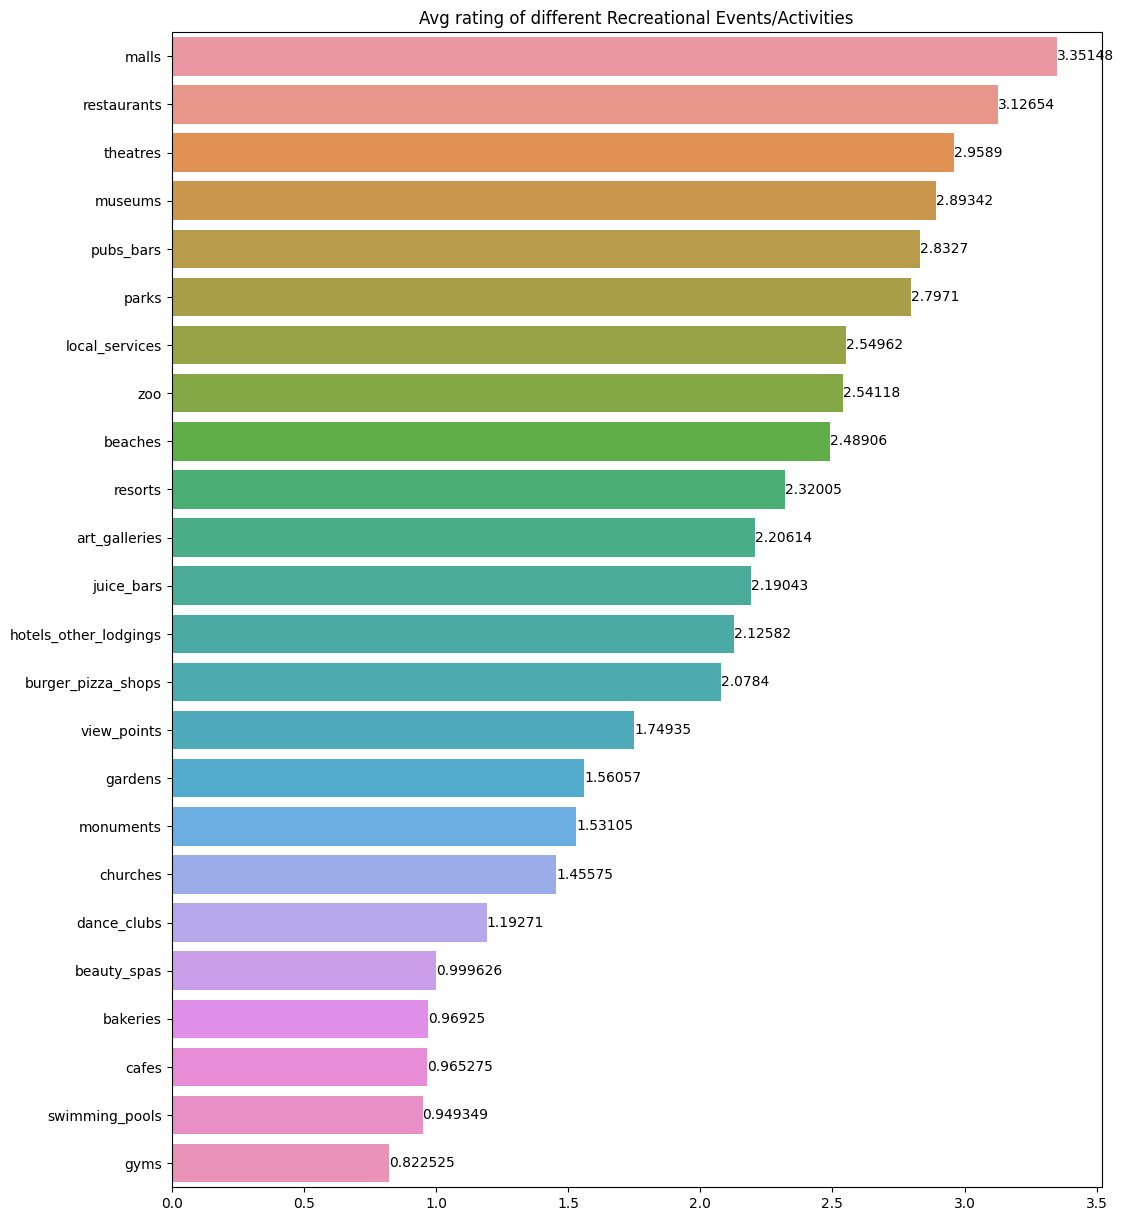

In [23]:
plt.figure(figsize=(12,15))
ax = sns.barplot(y=avg_rating.index,x=avg_rating.values,
                order = avg_rating.sort_values(ascending=False).index)
ax.bar_label(ax.containers[0])
plt.title('Avg rating of different Recreational Events/Activities')
plt.show()

In [24]:
df.head()

,User,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [25]:
df.columns

Index(['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

In [27]:
data = df.iloc[:,1:]
data.columns

Index(['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

#### Corr

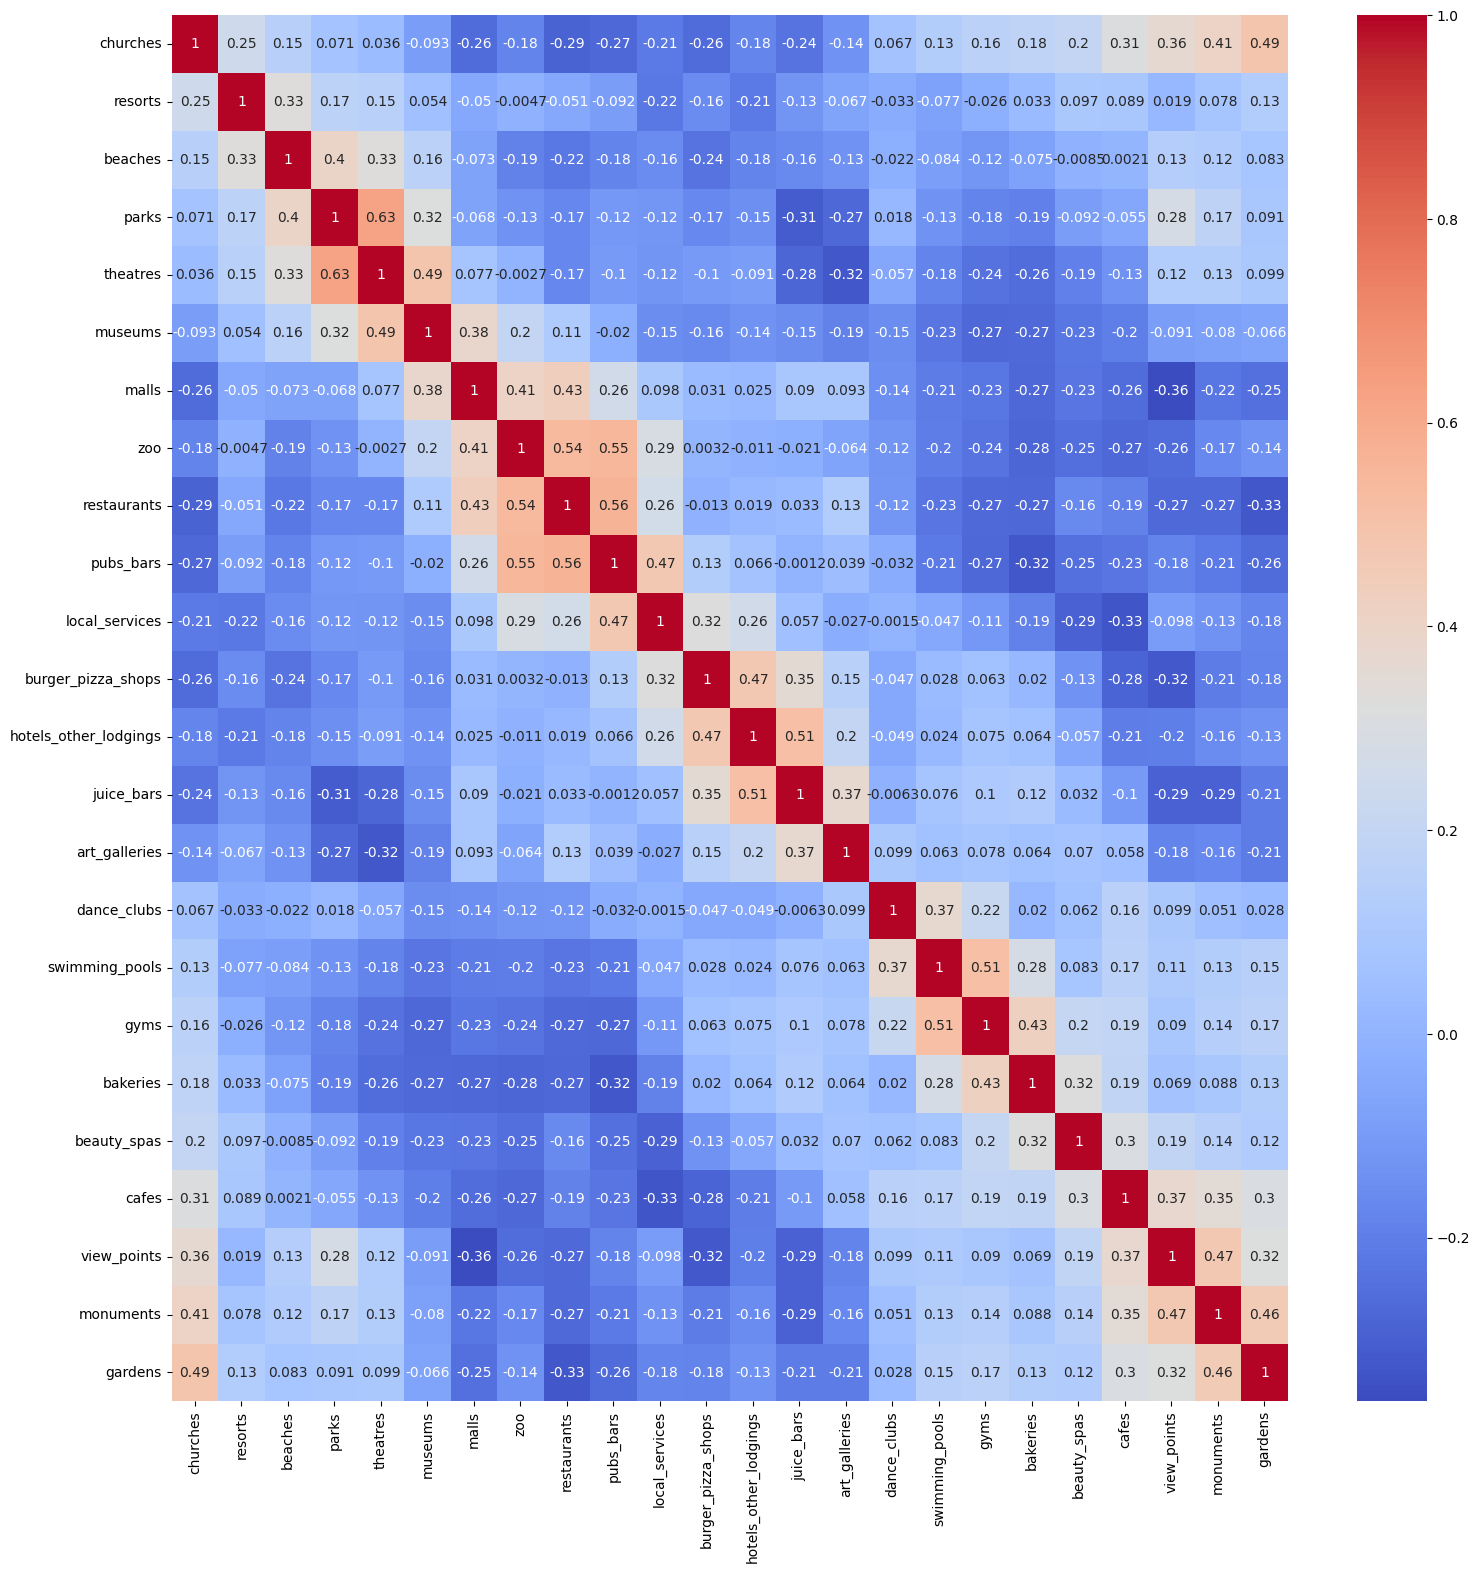

In [44]:
corr = df.iloc[:,1:].corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#### Outlier Detection and Treatment

In [30]:
a = df.describe(percentiles=[0.01,0.02,0.03,0.05,0.10]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,10%,50%,max
churches,0.00,0.00,0.00,0.00,0.5500,0.690,1.34,5.0
resorts,0.00,0.00,0.51,0.55,0.6400,0.850,1.91,5.0
beaches,0.00,0.86,1.18,1.26,1.3100,1.390,2.06,5.0
parks,0.83,1.26,1.32,1.33,1.3600,1.420,2.46,5.0
theatres,1.12,1.26,1.33,1.34,1.3900,1.450,2.67,5.0
museums,1.11,1.25,1.29,1.32,1.3700,1.460,2.68,5.0
malls,1.12,1.23,1.28,1.30,1.3600,1.550,3.23,5.0
zoo,0.86,0.97,1.11,1.18,1.2800,1.363,2.17,5.0
restaurants,0.84,1.19,1.25,1.30,1.3500,1.510,2.80,5.0
pubs_bars,0.81,0.87,0.95,1.02,1.1900,1.360,2.68,5.0


In [34]:
a1 = df.describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a1  = a1.iloc[:,3:]
a1

,min,50%,95%,96%,97%,98%,99%,max
churches,0.00,1.34,2.6400,2.6900,3.66,4.4394,5.0,5.0
resorts,0.00,1.91,5.0000,5.0000,5.00,5.0000,5.0,5.0
beaches,0.00,2.06,5.0000,5.0000,5.00,5.0000,5.0,5.0
parks,0.83,2.46,5.0000,5.0000,5.00,5.0000,5.0,5.0
theatres,1.12,2.67,5.0000,5.0000,5.00,5.0000,5.0,5.0
museums,1.11,2.68,5.0000,5.0000,5.00,5.0000,5.0,5.0
malls,1.12,3.23,5.0000,5.0000,5.00,5.0000,5.0,5.0
zoo,0.86,2.17,5.0000,5.0000,5.00,5.0000,5.0,5.0
restaurants,0.84,2.80,5.0000,5.0000,5.00,5.0000,5.0,5.0
pubs_bars,0.81,2.68,5.0000,5.0000,5.00,5.0000,5.0,5.0


In [36]:
df.shape

(5454, 25)

In [37]:
print(df[df['gyms']>2.7488].shape)
print(df[df['cafes']>2.6300].shape)
print(df[df['cafes']>3.7700].shape)

(219, 25)
(263, 25)
(216, 25)


In [39]:
print(len(data.columns))

24


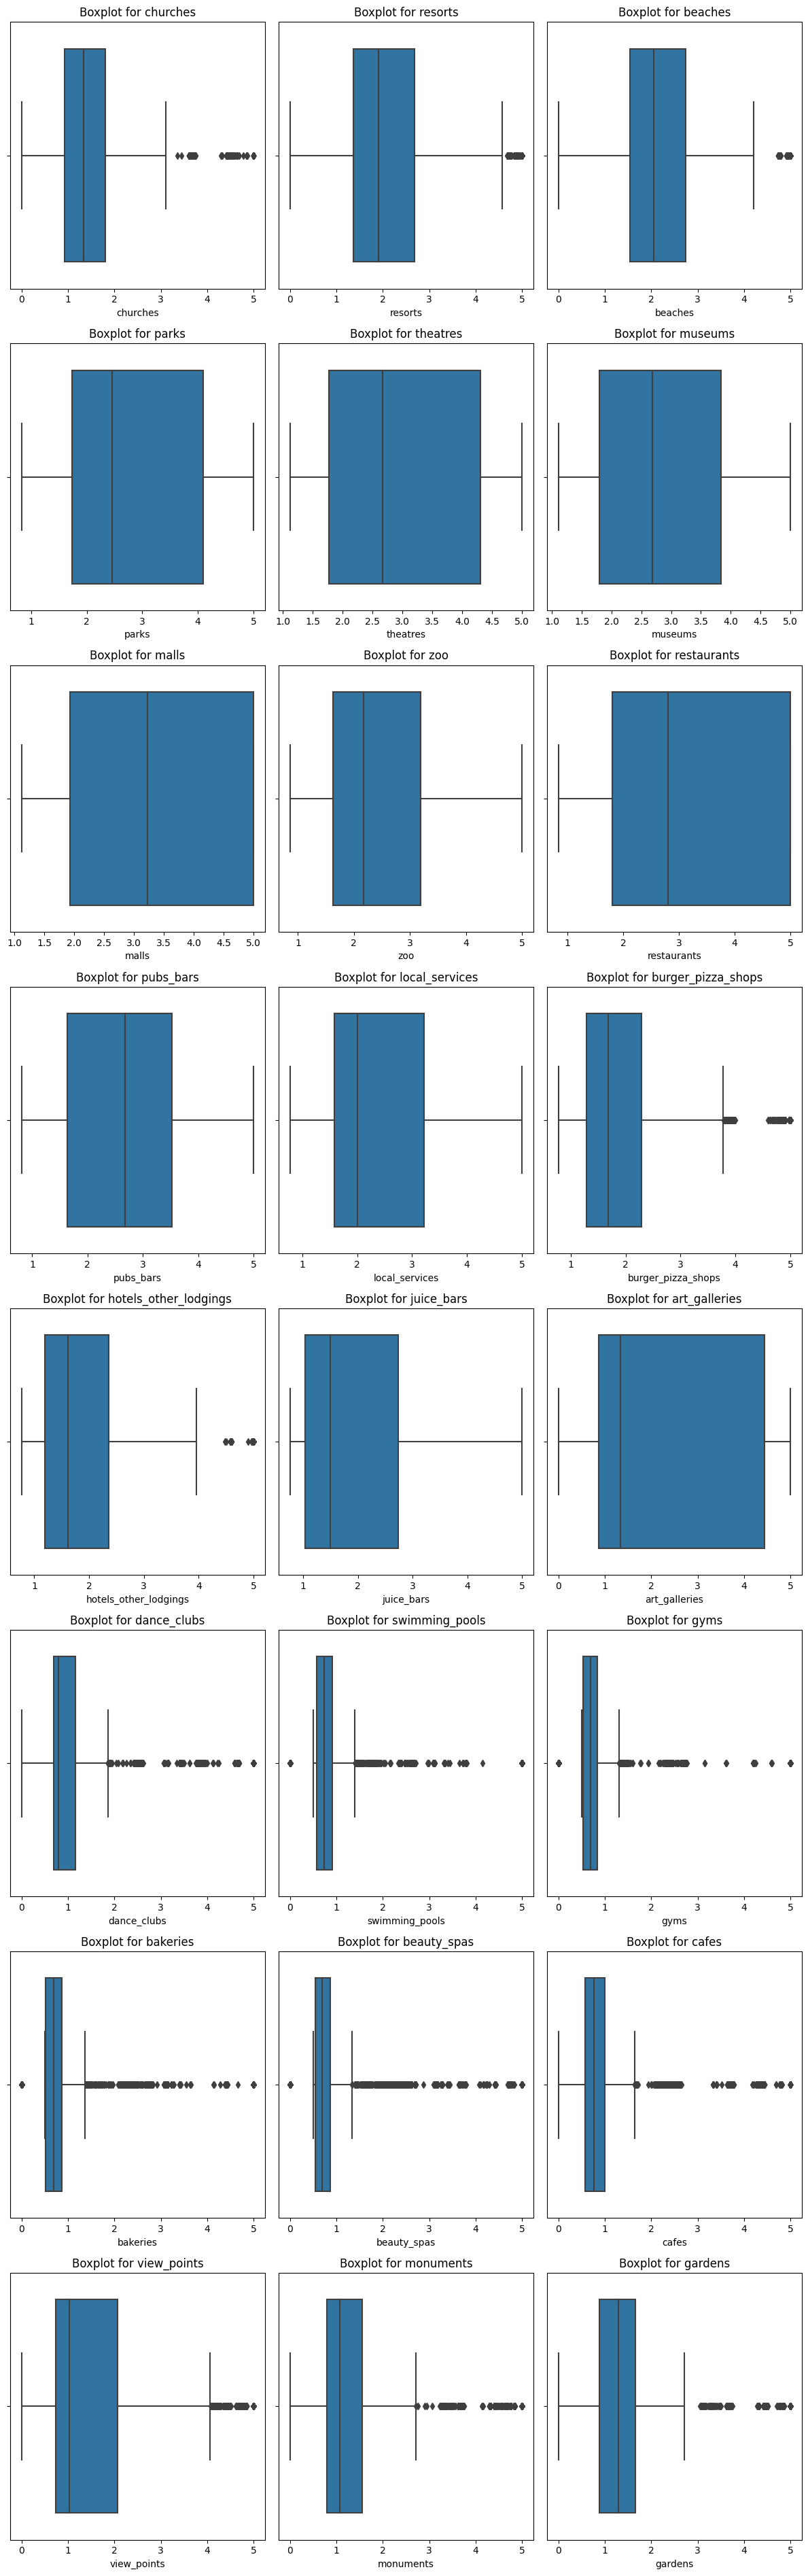

In [42]:
cols = data.columns
plt.figure(figsize=(12,38))
for i in range(len(cols)):
    plt.subplot(8,3,i+1)
    sns.boxplot(x=data[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['User', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services',
       'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars',
       'art_galleries', 'dance_clubs', 'swimming_pools', 'gyms', 'bakeries',
       'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens'],
      dtype='object')

In [50]:
cols_right_sk = ['churches','resorts','beaches','burger_pizza_shops', 
                 'hotels_other_lodgings',
                 'dance_clubs', 'swimming_pools', 'gyms','bakeries',
                 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

def out_treat_right_skew(x):
    x = x.clip(upper=x.quantile(0.97))
    return x

In [51]:
data1 = data.copy()

In [52]:
data[cols_right_sk] = data[cols_right_sk].apply(out_treat_right_skew)

### Scaling

In [24]:
# from sklearn.preprocessing import StandardScaler

In [53]:
# x = df.iloc[:,1:]
# x.dtypes.value_counts()

In [27]:
# sc = StandardScaler()
# df_sc =  sc.fit_transform(x)

In [56]:
import time

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram

Time Gap 15.298326015472412


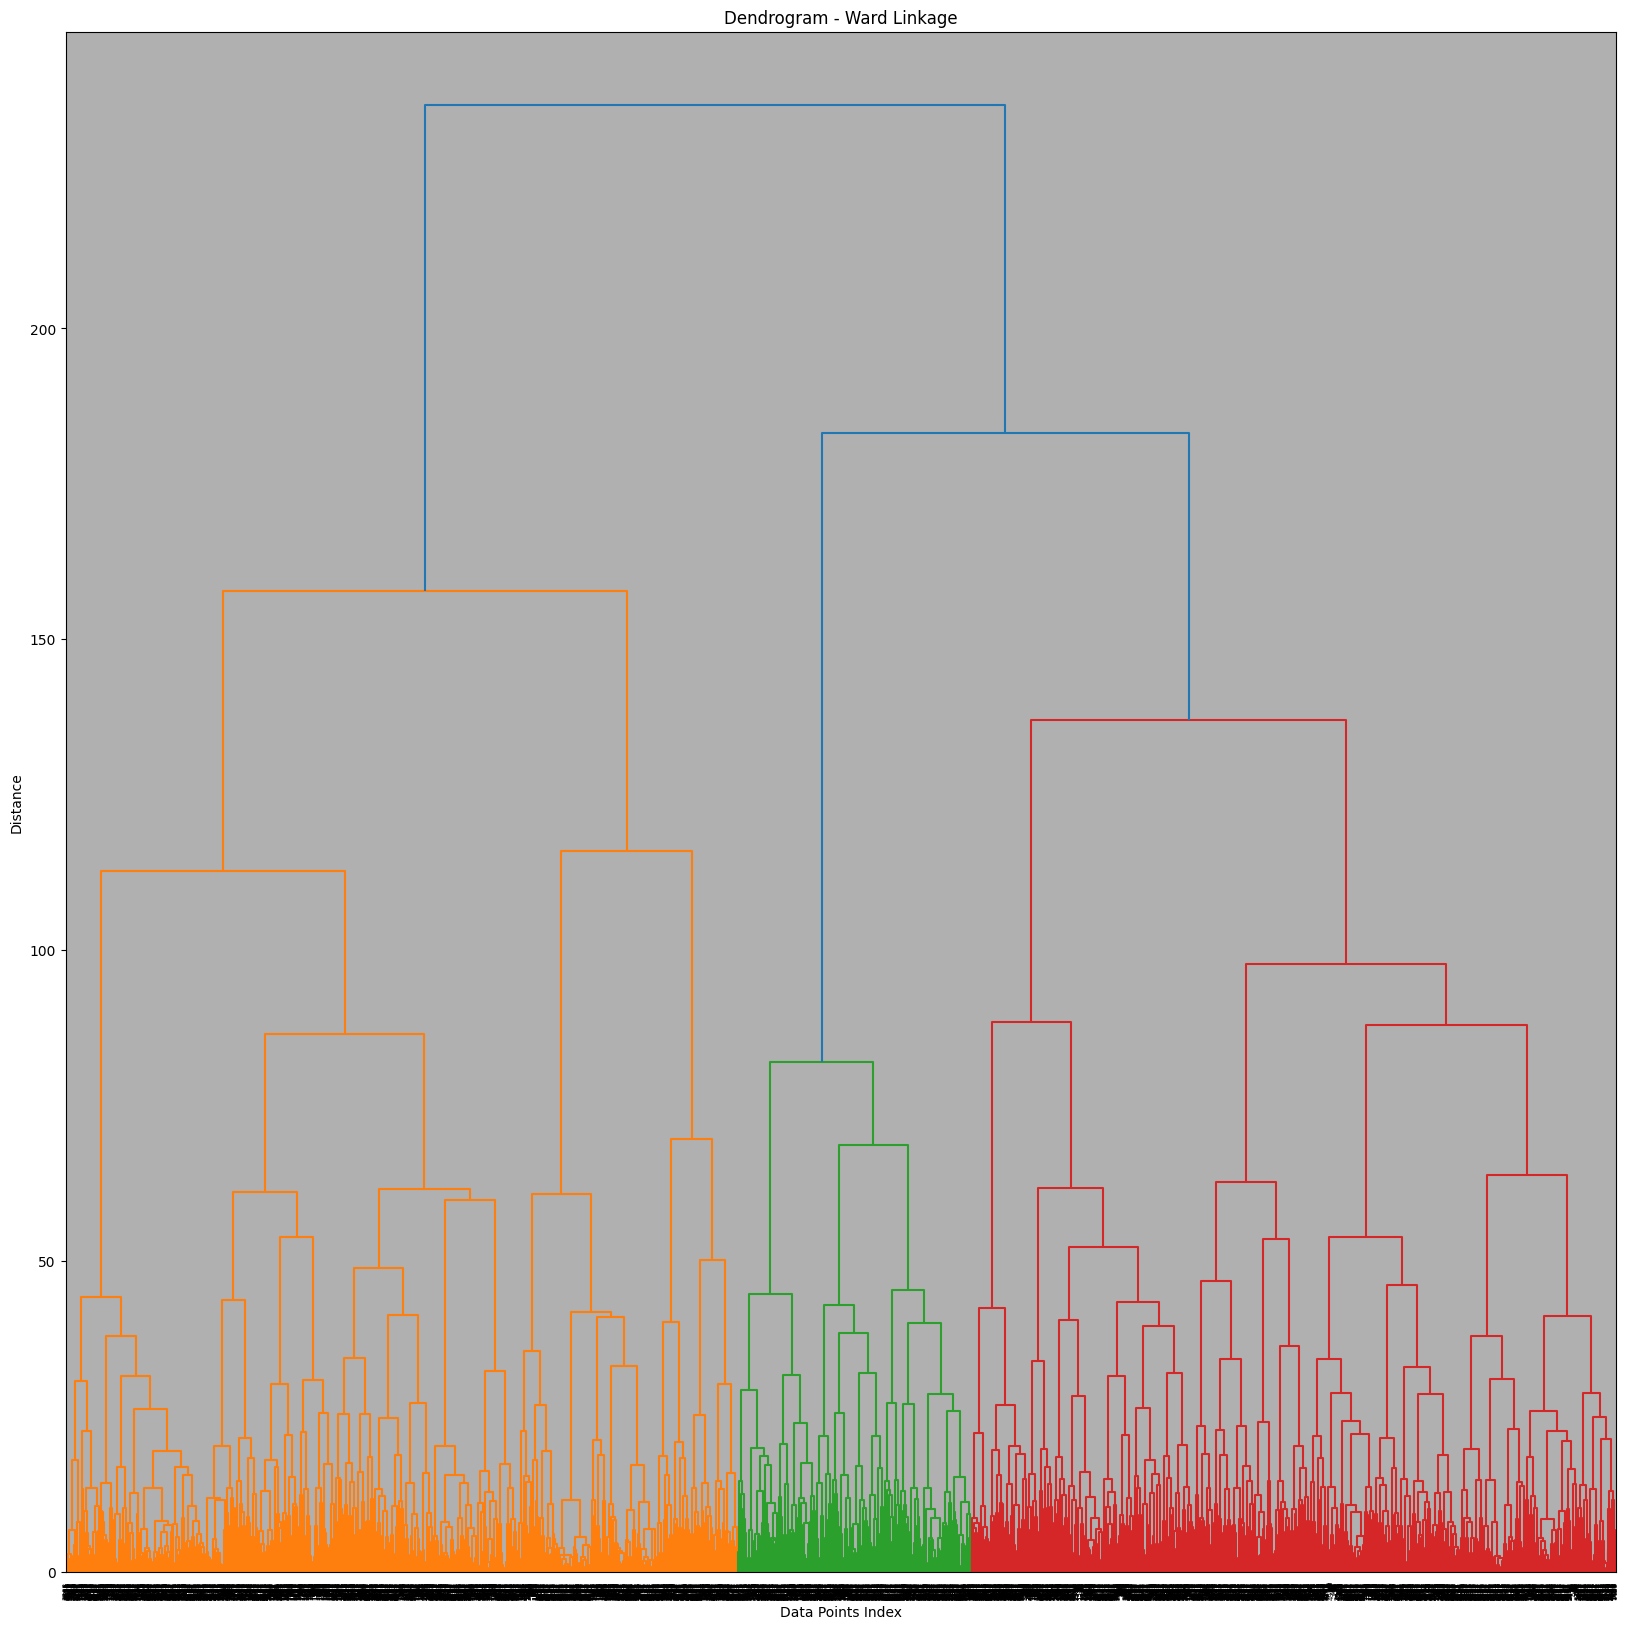

In [57]:
plt.figure(figsize=(20,20))
st = time.time()
dendrogram(linkage(data,method='ward'))
et = time.time()
print('Time Gap',et-st)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Data Points Index')
plt.ylabel('Distance')
plt.grid()
plt.show()

#### Inference
Clusters = 3,4,5,7,8

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
from sklearn.cluster import KMeans

In [62]:
wcss = []
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(data)
    wcss.append(model.inertia_)
print('WCSS',wcss)

WCSS [214253.19389627787, 182471.0517601861, 164148.40858044536, 149593.89788845467, 140207.2938756401, 133158.26375907238, 127941.55823828308, 124021.98890141891, 119851.0561861404, 115579.24113441214, 112429.02151260895, 109546.26433693452, 107269.43390100735, 104582.29067071459]


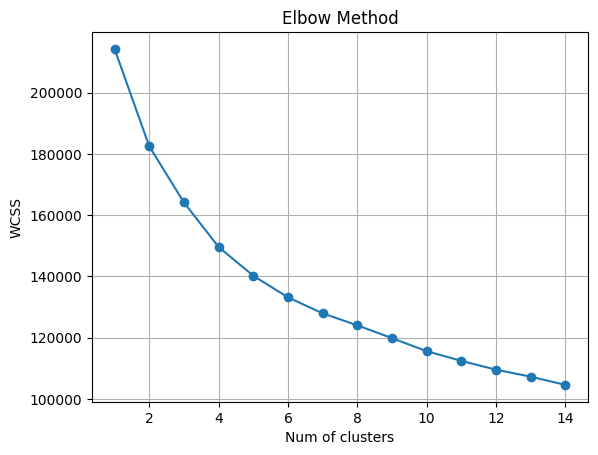

In [64]:
plt.plot(list(range(1,15)),wcss,marker='o')
plt.xlabel('Num of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [68]:
from sklearn.cluster import AgglomerativeClustering
from collections import Counter

In [67]:
x1 = data.copy()
x2 = data.copy()
x3 = data.copy()
x4 = data.copy()

In [69]:
model4 = AgglomerativeClustering(n_clusters=4,linkage='ward')
ypred4 = model4.fit_predict(data)

In [70]:
Counter(ypred4)

Counter({0: 2267, 3: 1594, 2: 820, 1: 773})

In [71]:
x1['Cls4'] = ypred4
x1.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens,Cls4
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [78]:
r1 = x1.drop('Cls4',axis=1).mean().reset_index()
r1.columns =['Feature','Mean']
r1

,Feature,Mean
0,churches,1.428957
1,resorts,2.320048
2,beaches,2.489059
3,parks,2.797103
4,theatres,2.958904
5,museums,2.893423
6,malls,3.351476
7,zoo,2.541177
8,restaurants,3.126542
9,pubs_bars,2.832695


In [95]:
r2 =x1.groupby('Cls4').mean().T.reset_index()
# r2.columns = ['Feature','0','1','2','3']
r2.rename(columns={'index':'Feature'},inplace=True)
r2

Cls4,Feature,0,1,2,3
0,churches,1.528019,0.944916,2.142220,1.155878
1,resorts,2.561959,1.187542,2.744780,2.306706
2,beaches,3.043273,1.727555,2.551695,2.037917
3,parks,3.722470,1.798292,2.313134,2.214373
4,theatres,4.053388,1.780362,2.060073,2.436230
5,museums,3.557464,1.806740,1.886646,2.993915
6,malls,3.429180,3.129677,1.862146,4.114680
7,zoo,2.430953,2.125692,1.505305,3.432309
8,restaurants,2.792744,2.803131,1.882549,4.398055
9,pubs_bars,2.510737,2.890505,1.485195,3.955747


In [96]:
res = pd.merge(r1,r2,on='Feature')
res

,Feature,Mean,0,1,2,3
0,churches,1.428957,1.528019,0.944916,2.142220,1.155878
1,resorts,2.320048,2.561959,1.187542,2.744780,2.306706
2,beaches,2.489059,3.043273,1.727555,2.551695,2.037917
3,parks,2.797103,3.722470,1.798292,2.313134,2.214373
4,theatres,2.958904,4.053388,1.780362,2.060073,2.436230
5,museums,2.893423,3.557464,1.806740,1.886646,2.993915
6,malls,3.351476,3.429180,3.129677,1.862146,4.114680
7,zoo,2.541177,2.430953,2.125692,1.505305,3.432309
8,restaurants,3.126542,2.792744,2.803131,1.882549,4.398055
9,pubs_bars,2.832695,2.510737,2.890505,1.485195,3.955747


In [120]:
def Agg_Cls(k,org_data):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    ypred = model.fit_predict(org_data)
    print(Counter(ypred))
    org_data[f'Cls{k}'] = ypred
    r1 = org_data.drop(f'Cls{k}',axis=1).mean().reset_index()
    r1.columns =['Feature','Mean']
    r2 = org_data.groupby(f'Cls{k}').mean().T.reset_index()
    r2.rename(columns={'index':'Feature'},inplace=True)
    cls_profile = pd.merge(r1,r2,on='Feature')
    plt.bar(Counter(ypred).keys(),Counter(ypred).values())
    plt.xticks(list(range(k)))
    plt.title(f'Freq of different clusters for K= {k}')
    plt.show()
    org_data.drop(f'Cls{k}',axis=1,inplace=True)
    return cls_profile, ypred

#### Clusters - 4

Counter({0: 2267, 3: 1594, 2: 820, 1: 773})


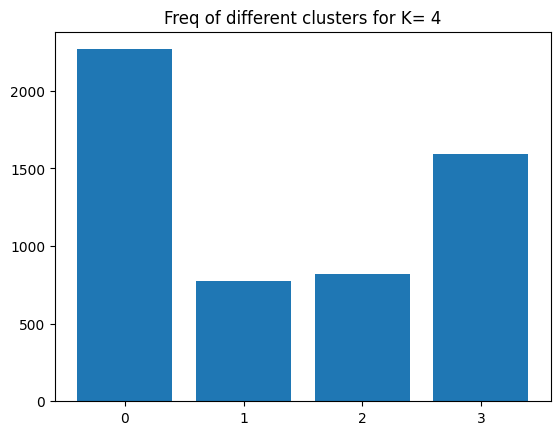

,Feature,Mean,0,1,2,3
0,churches,1.428957,1.528019,0.944916,2.142220,1.155878
1,resorts,2.320048,2.561959,1.187542,2.744780,2.306706
2,beaches,2.489059,3.043273,1.727555,2.551695,2.037917
3,parks,2.797103,3.722470,1.798292,2.313134,2.214373
4,theatres,2.958904,4.053388,1.780362,2.060073,2.436230
5,museums,2.893423,3.557464,1.806740,1.886646,2.993915
6,malls,3.351476,3.429180,3.129677,1.862146,4.114680
7,zoo,2.541177,2.430953,2.125692,1.505305,3.432309
8,restaurants,3.126542,2.792744,2.803131,1.882549,4.398055
9,pubs_bars,2.832695,2.510737,2.890505,1.485195,3.955747


In [121]:
cls4_profile,ypred4 = Agg_Cls(4,x2)
cls4_profile

#### Clusters - 5

Counter({1: 1594, 3: 1485, 2: 820, 4: 782, 0: 773})


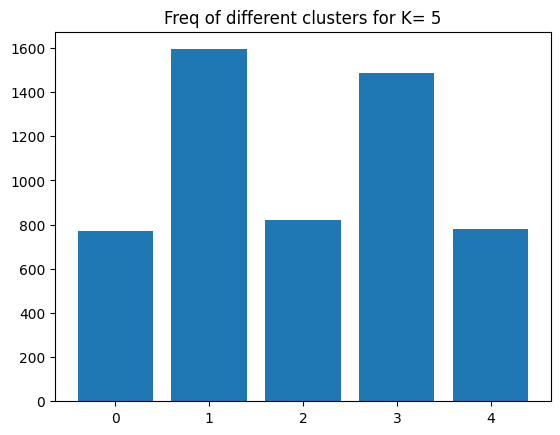

,Feature,Mean,0,1,2,3,4
0,churches,1.428957,0.944916,1.155878,2.142220,1.445057,1.685563
1,resorts,2.320048,1.187542,2.306706,2.744780,2.759475,2.186880
2,beaches,2.489059,1.727555,2.037917,2.551695,3.037165,3.054872
3,parks,2.797103,1.798292,2.214373,2.313134,3.477933,4.186841
4,theatres,2.958904,1.780362,2.436230,2.060073,4.081327,4.000332
5,museums,2.893423,1.806740,2.993915,1.886646,3.770660,3.152609
6,malls,3.351476,3.129677,4.114680,1.862146,3.773556,2.775217
7,zoo,2.541177,2.125692,3.432309,1.505305,2.519677,2.262468
8,restaurants,3.126542,2.803131,4.398055,1.882549,2.824983,2.731522
9,pubs_bars,2.832695,2.890505,3.955747,1.485195,2.340902,2.833248


In [123]:
cls5_profile,ypred5 = Agg_Cls(5,x2)
cls5_profile

#### Clusters - 7

Counter({0: 1485, 4: 1100, 2: 820, 1: 782, 6: 494, 5: 486, 3: 287})


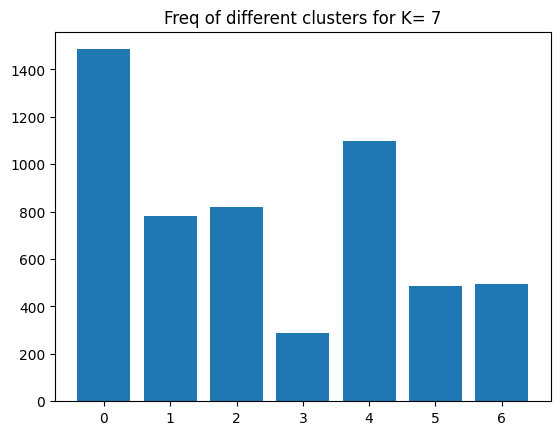

,Feature,Mean,0,1,2,3,4,5,6
0,churches,1.428957,1.445057,1.685563,2.142220,1.467735,1.116200,0.636173,1.244231
1,resorts,2.320048,2.759475,2.186880,2.744780,1.664843,2.698964,0.905679,1.433259
2,beaches,2.489059,3.037165,3.054872,2.551695,1.987666,2.258309,1.573951,1.547166
3,parks,2.797103,3.477933,4.186841,2.313134,2.209129,2.262100,1.555679,2.108097
4,theatres,2.958904,4.081327,4.000332,2.060073,2.145610,2.525964,1.564671,2.236417
5,museums,2.893423,3.770660,3.152609,1.886646,2.163275,3.282255,1.596193,2.351862
6,malls,3.351476,3.773556,2.775217,1.862146,3.485575,4.483618,2.919506,3.293158
7,zoo,2.541177,2.519677,2.262468,1.505305,2.423902,3.360027,1.949588,3.593259
8,restaurants,3.126542,2.824983,2.731522,1.882549,2.876655,4.388709,2.759712,4.418866
9,pubs_bars,2.832695,2.340902,2.833248,1.485195,2.770418,3.766891,2.961420,4.376275


In [124]:
cls7_profile,ypred7 = Agg_Cls(7,x2)
cls7_profile

#### Clusters - 3

Counter({0: 2367, 1: 2267, 2: 820})


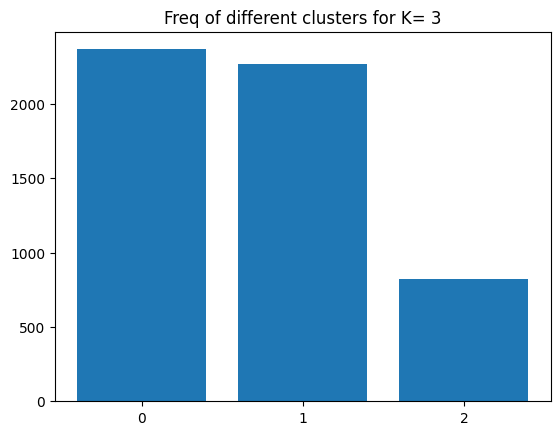

,Feature,Mean,0,1,2
0,churches,1.428957,1.086984,1.528019,2.142220
1,resorts,2.320048,1.941217,2.561959,2.744780
2,beaches,2.489059,1.936561,3.043273,2.551695
3,parks,2.797103,2.078492,3.722470,2.313134
4,theatres,2.958904,2.222041,4.053388,2.060073
5,museums,2.893423,2.606215,3.557464,1.886646
6,malls,3.351476,3.793004,3.429180,1.862146
7,zoo,2.541177,3.005602,2.430953,1.505305
8,restaurants,3.126542,3.877195,2.792744,1.882549
9,pubs_bars,2.832695,3.607866,2.510737,1.485195


In [125]:
cls3_profile,ypred3 = Agg_Cls(3,x2)
cls3_profile

#### Clusters - 8

Counter({4: 1100, 1: 1075, 2: 820, 0: 782, 6: 494, 5: 486, 7: 410, 3: 287})


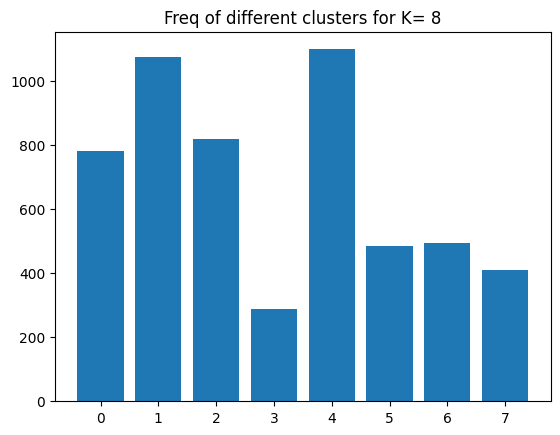

,Feature,Mean,0,1,2,3,4,5,6,7
0,churches,1.428957,1.685563,1.260298,2.142220,1.467735,1.116200,0.636173,1.244231,1.929488
1,resorts,2.320048,2.186880,2.750009,2.744780,1.664843,2.698964,0.905679,1.433259,2.784293
2,beaches,2.489059,3.054872,3.222577,2.551695,1.987666,2.258309,1.573951,1.547166,2.551024
3,parks,2.797103,4.186841,3.474223,2.313134,2.209129,2.262100,1.555679,2.108097,3.487659
4,theatres,2.958904,4.000332,4.080586,2.060073,2.145610,2.525964,1.564671,2.236417,4.083268
5,museums,2.893423,3.152609,3.956912,1.886646,2.163275,3.282255,1.596193,2.351862,3.282317
6,malls,3.351476,2.775217,3.923330,1.862146,3.485575,4.483618,2.919506,3.293158,3.380854
7,zoo,2.541177,2.262468,2.486902,1.505305,2.423902,3.360027,1.949588,3.593259,2.605610
8,restaurants,3.126542,2.731522,2.981228,1.882549,2.876655,4.388709,2.759712,4.418866,2.415317
9,pubs_bars,2.832695,2.833248,2.349507,1.485195,2.770418,3.766891,2.961420,4.376275,2.318341


In [126]:
cls8_profile,ypred8 = Agg_Cls(8,x2)
cls8_profile